In [12]:
import numpy as np
from fourier import compute_fourier_coeff
from signal_functions import truncated_sine_series
from fourier import compute_fourier_coeff
from kernels import complex_exponential_kernel, dirichlet_kernel_shifted
from inference_utils import  run_inference_frequency_localized, run_inference_time_localized
from plotting import  plot_compare_approximations

import matplotlib.pyplot as plt

In [13]:
#TODO
# lambda has to be very small (and not only depend on N) to get a good approx
#why are the Fourier coefficients of the kernel also negative? the imaginary part seems small enough

In [14]:
#CHOOSE number of input functions
num_samples = 250

grid_size = 2**11 # grid points

t_left = 0
t_right = 1   #2*np.pi

time_span = t_right - t_left

time_array = np.linspace(t_left,t_right,grid_size)


In [15]:
#parameter for target signal
target_decay_rate = 2.51  # decay rate of the target signal   #2.51
noise = .01 # noise level

In [16]:
# Ground truth function and observation  noise         
# y_i = x_i * target + noise, where x_i is the input signal

sum_terms_target = 3  # index  of truncation of the fourier series
target = truncated_sine_series(
    input_points=time_array, decay_rate=target_decay_rate, num_terms=sum_terms_target
)

##fourier coefficients of w_true
target_fourier_coeff = compute_fourier_coeff(
    target, time_span
)  # normalized by the number of grid points


In [17]:
# the kernel

# complex exponential kernel
kernel_decay_rate =  2 # decay rate of the  complex exponential kernel   #1.01
sum_terms_kernel = sum_terms_target
evaluated_kernel = complex_exponential_kernel(time_array, kernel_decay_rate, sum_terms_kernel)
kernel_coeff = compute_fourier_coeff(evaluated_kernel, time_span)
kernel_coeff_abs = np.abs(kernel_coeff)   #TODO why do you need to take abs?


# dirichlet kernel
# order_dirichlet_ker = sum_terms_target
# evaluated_kernel = dirichlet_kernel_shifted(time_array, order_dirichlet_ker, L=1/2)
# kernel_decay_rate = 0

# kernel_coeff = compute_fourier_coeff(evaluated_kernel, time_span)
# kernel_coeff_abs = np.abs(kernel_coeff)   #TODO why do you need to take abs?
# kernel_coeff = np.ones(grid_size)


In [18]:
# freq-loc input signals 
freq_loc_inputs_decay = 1 
freq_max = sum_terms_target 

alpha_freq_loc = 1 / 3
b_freq_loc = 3

In [19]:
# run inference for freq-localized signals
prediction_four_coeff_freq_loc, prediction_freq_loc = run_inference_frequency_localized(
    num_samples=num_samples,
    time_array=time_array,
    time_span=time_span,
    kernel_coeff=kernel_coeff,
    target_fourier_coeff=target_fourier_coeff,
    noise=noise,
    alpha=alpha_freq_loc,
    b = b_freq_loc,
    freq_loc_inputs_decay=freq_loc_inputs_decay,
    freq_max=freq_max,
)

In [20]:
#time-loc inputsignals 
loc_parameter = 0.0001
alpha_time_loc = 1 / 2
b_time_loc = 2


In [21]:
prediction_four_coeff_time_loc, prediction_time_loc = run_inference_time_localized(
    num_samples=num_samples,
    time_array=time_array,
    time_span=time_span,
    kernel_coeff=kernel_coeff,
    target_fourier_coeff=target_fourier_coeff,
    noise=noise,
    alpha=alpha_time_loc,
    b = b_time_loc,
    loc_parameter = loc_parameter
)

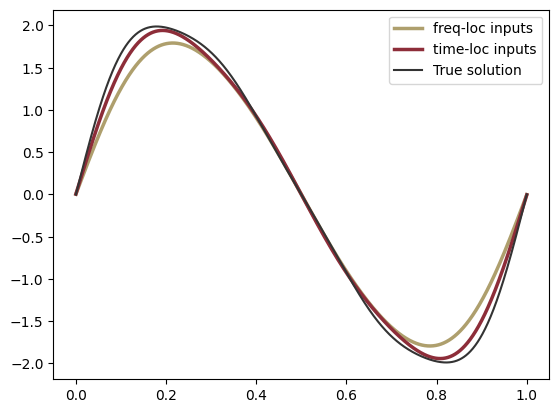

In [22]:
plot_compare_approximations(time_array = time_array, target=target, prediction_freq_loc=prediction_freq_loc, prediction_time_loc=prediction_time_loc)